In [13]:
import gym
import gym_anytrading
from gym import spaces
from gym.utils import seeding
import numpy as np
from enum import Enum


from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import A2C
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

import pandas as pd
from matplotlib import pyplot as plt
from typing import Callable, Dict, List, Optional, Tuple, Type, Union

import torch as th
from torch import nn

from stable_baselines3 import PPO
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

from finta import TA
# from gym_anytrading.envs import StocksEnv


import os

In [10]:
df = pd.read_csv('data/N225.csv')
df.shape
df.dropna(inplace=True)
df['RSI'] = TA.RSI(df)
df['SMA'] = TA.SMA(df,14)
df['ATR'] = TA.ATR(df)
df.dropna(inplace=True)

In [14]:
# import pytest
import numpy as np
from easydict import EasyDict
from dizoo.gym_anytrading.envs import StocksEnv


In [15]:
env = StocksEnv(df=df,window_size = 9, frame_bound=(9,18))

TypeError: __init__() got an unexpected keyword argument 'df'

info {'total_reward': 138.88867200000095, 'total_profit': 0.986689374842003, 'position': 1}


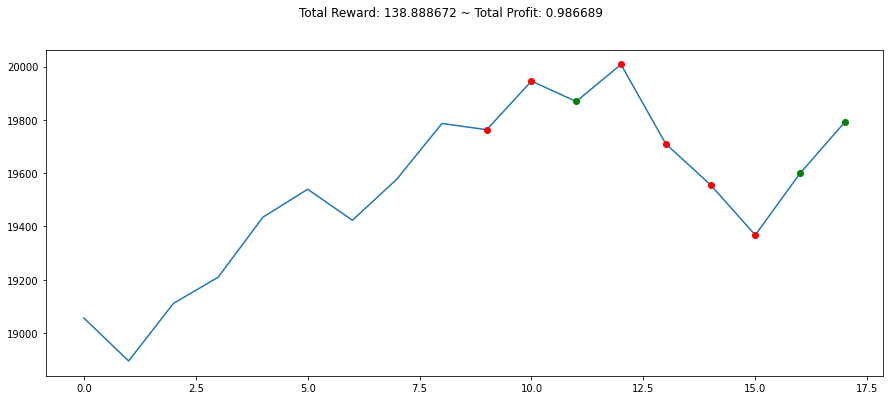

In [12]:
state = env.reset()
while True:
    action = env.action_space.sample()
    # action = 0
    n_state, reward,done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [16]:
class TestStocksEnv:
    def test_naive(self):
        env = StocksEnv(EasyDict({"env_id": 'stocks-v0', "eps_length": 300,\
            "window_size": 20, "train_range": None, "test_range": None, "stocks_data_filename": 'N225.csv'}))
        env.seed(314, dynamic_seed=False)
        assert env._seed == 314
        obs = env.reset()
        assert obs.shape == (62, )
        for _ in range(5):
            env.reset()
            np.random.seed(314)
            print('=' * 60)
            for i in range(10):
                # Both ``env.random_action()``, and utilizing ``np.random`` as well as action space,
                # can generate legal random action.
                if i < 5:
                    random_action = np.array([env.action_space.sample()])
                else:
                    random_action = env.random_action()
                timestep = env.step(random_action)
                print(timestep)
                assert isinstance(timestep.obs, np.ndarray)
                assert isinstance(timestep.done, bool)
                assert timestep.obs.shape == (62, )
                assert timestep.reward.shape == (1, )
                assert timestep.reward >= env.reward_space.low
                assert timestep.reward <= env.reward_space.high
        print(env.observation_space, env.action_space, env.reward_space)
        env.close()

In [18]:
test = TestStocksEnv()

In [19]:
test.test_naive()

AssertionError: You need to put the stock data under the 'DI-engine/dizoo/gym_anytrading/envs/data' folder.
         if using StocksEnv, you can download Google stocks data at         https://github.com/AminHP/gym-anytrading/blob/master/gym_anytrading/datasets/data/STOCKS_GOOGL.csv